In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm  #colormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

import regionmask

In [2]:
topDir = '/Users/naomi/Projects/python/warmingStripes/warmingStripesFriendshipBracelets/'
tempData = xr.open_dataset(topDir+'gistemp1200_GHCNv4_ERSSTv5.nc') 
tempData = tempData['tempanomaly']
tempData = tempData.sel(time=slice('18800101','20191231')) #make sure there are only FULL years

In [3]:
GMT = (tempData * np.sqrt(np.cos(np.deg2rad(tempData.lat)))).mean('lat').mean('lon')
GMT

<xarray.DataArray (time: 1680)>
array([-0.18567 , -0.277596, -0.124842, ...,  0.898746,  0.854731,  0.916263],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2019-12-15

### quantize into 7 bins:

In [4]:
gmtDF = GMT.resample(time='1AS').mean('time').to_pandas()
quantized = pd.cut(gmtDF,bins=7,labels=False)

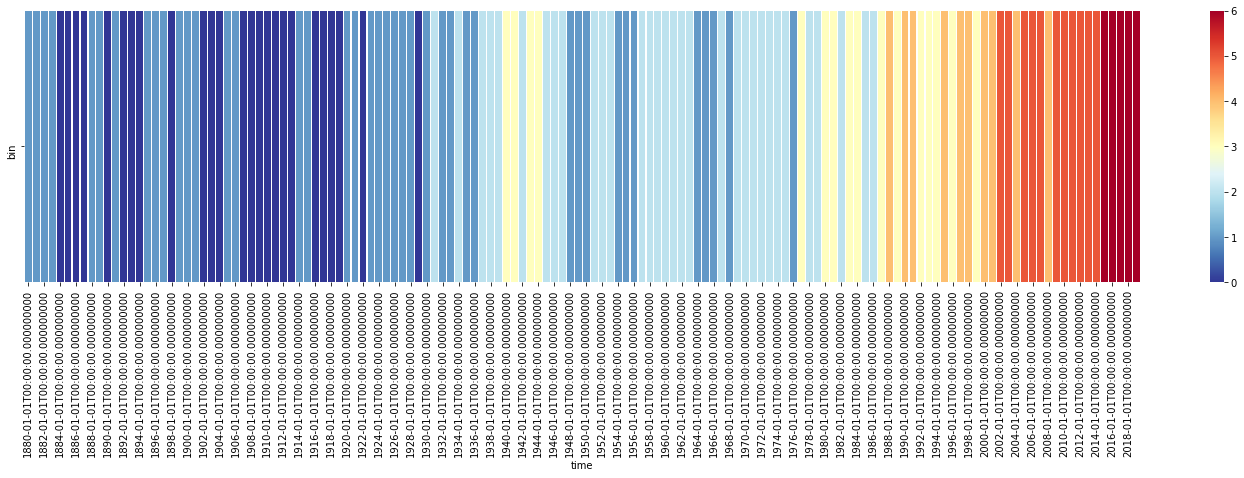

In [5]:
quantized.name = 'bin'
plt.figure(figsize=[25,5])
#plt.pcolor(pd.DataFrame(quantized).T,cmap=cm.RdBu_r)
sns.heatmap(pd.DataFrame(quantized).T,cmap=cm.RdYlBu_r,linewidths=0.1)

### Print easy-to-read instructions:

In [6]:
colorList = ['dark blue', 'medium blue', 'light blue', 'yellow','pink','medium red','dark red']
newList = []
iPrev = quantized[quantized.index[0]]
count = 1
for i in quantized[quantized.index[1]::]:
    if i == iPrev:
        count += 1
    else:
        newList.append(str(count)+' of '+colorList[iPrev])
        count = 1
    iPrev=i
newList.append(str(count)+' of '+colorList[iPrev])
for item in newList:
    print(item,'\n')

4 of medium blue 

4 of dark blue 

2 of medium blue 

1 of dark blue 

1 of medium blue 

3 of dark blue 

3 of medium blue 

1 of dark blue 

3 of medium blue 

3 of dark blue 

2 of medium blue 

7 of dark blue 

2 of medium blue 

4 of dark blue 

2 of medium blue 

1 of dark blue 

6 of medium blue 

1 of dark blue 

1 of medium blue 

1 of light blue 

2 of medium blue 

1 of light blue 

2 of medium blue 

3 of light blue 

2 of yellow 

1 of light blue 

2 of yellow 

3 of light blue 

3 of medium blue 

3 of light blue 

3 of medium blue 

7 of light blue 

3 of medium blue 

1 of light blue 

1 of medium blue 

7 of light blue 

1 of medium blue 

1 of yellow 

2 of light blue 

2 of yellow 

1 of light blue 

2 of yellow 

2 of light blue 

1 of yellow 

1 of pink 

1 of yellow 

2 of pink 

3 of yellow 

1 of pink 

1 of yellow 

2 of pink 

1 of yellow 

2 of pink 

2 of medium red 

1 of pink 

3 of medium red 

1 of pink 

6 of medium red 

5 of dark red 



In [7]:
### test it against this:
pd.DataFrame(quantized).style.background_gradient(cmap=cm.RdBu_r)

,bin
time,
1880-01-01 00:00:00,1
1881-01-01 00:00:00,1
1882-01-01 00:00:00,1
1883-01-01 00:00:00,1
1884-01-01 00:00:00,0
1885-01-01 00:00:00,0
1886-01-01 00:00:00,0
1887-01-01 00:00:00,0
1888-01-01 00:00:00,1


## Now do it for any state:

In [96]:
tempDataLand = xr.open_dataset(topDir+'gistemp250_GHCNv4.nc') 
tempDataLand = tempDataLand['tempanomaly']
tempDataLand = tempDataLand.sel(time=slice('18800101','20191231')) #make sure there are only FULL years

In [97]:
states = regionmask.defined_regions.natural_earth.us_states_50
stateMask = states.mask(tempDataLand.lon, tempDataLand.lat) #, wrap_lon=True)

In [98]:
myState = 'WA'
stateIndex = np.argwhere(np.asarray(states.abbrevs) == myState)[0][0]
stateIndex

47

/Users/naomi/anaconda/envs/forPy3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


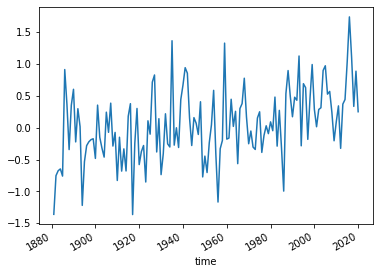

In [99]:
tempArea = tempDataLand.where(stateMask == stateIndex)
tempAtLoc = (tempArea * np.sqrt(np.cos(np.deg2rad(tempArea.lat)))).mean('lat').mean('lon')
tempAtLoc.resample(time='1A').mean('time').plot()

In [100]:
locDF = tempAtLoc.resample(time='1A').mean('time').to_pandas()
quantized = pd.cut(locDF,bins=7,labels=False)

Text(0.5, 1, 'Washington Warming Stripes')

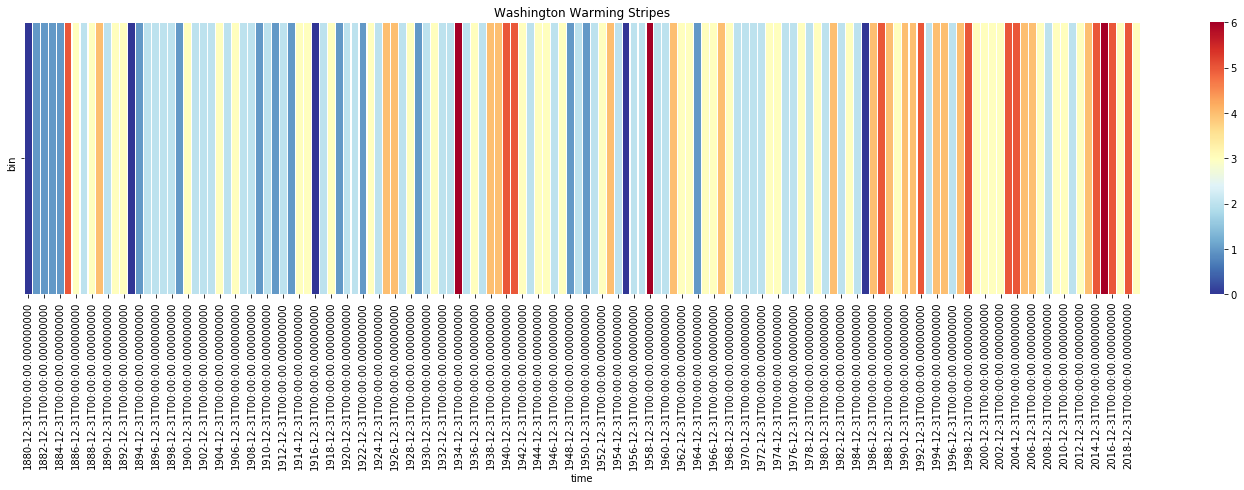

In [101]:
quantized.name = 'bin'
plt.figure(figsize=[25,5])
#plt.pcolor(pd.DataFrame(quantized).T,cmap=cm.RdBu_r)
sns.heatmap(pd.DataFrame(quantized).T,cmap=cm.RdYlBu_r,linewidths=0.1)
plt.title(states.names[stateIndex]+' Warming Stripes')

In [94]:
# sometimes needed if there's a NaN at the beginning:
quantized = quantized.dropna()
quantized = quantized.astype(int)

In [102]:
colorList = ['dark blue', 'medium blue', 'light blue', 'yellow','pink','medium red','dark red']
newList = []
iPrev = quantized[quantized.index[0]]
count = 1
for i in quantized[quantized.index[1]::]:
    if i == iPrev:
        count += 1
    else:
        newList.append(str(count)+' of '+colorList[iPrev])
        count = 1
    iPrev=i
newList.append(str(count)+' of '+colorList[iPrev])
for item in newList:
    print(item,'\n')

1 of dark blue 

4 of medium blue 

1 of medium red 

1 of yellow 

1 of light blue 

1 of yellow 

1 of pink 

1 of light blue 

2 of yellow 

1 of dark blue 

1 of medium blue 

4 of light blue 

1 of medium blue 

1 of yellow 

3 of light blue 

1 of yellow 

1 of light blue 

1 of yellow 

2 of light blue 

1 of medium blue 

1 of light blue 

1 of medium blue 

1 of light blue 

1 of medium blue 

2 of yellow 

1 of dark blue 

1 of light blue 

1 of yellow 

1 of medium blue 

2 of light blue 

1 of medium blue 

1 of yellow 

1 of light blue 

2 of pink 

1 of light blue 

1 of yellow 

1 of medium blue 

1 of light blue 

1 of yellow 

2 of light blue 

1 of dark red 

1 of light blue 

1 of yellow 

1 of light blue 

2 of pink 

2 of medium red 

1 of yellow 

1 of light blue 

2 of yellow 

1 of light blue 

1 of yellow 

1 of medium blue 

1 of light blue 

1 of medium blue 

1 of light blue 

1 of yellow 

1 of pink 

1 of light blue 

1 of dark blue 

2 of light blue 

1 o

## Now do it for any country:

In [28]:
countries = regionmask.defined_regions.natural_earth.countries_110
countryMask = countries.mask(tempDataLand.lon, tempDataLand.lat) #, wrap_lon=True)
for i,abbrev in enumerate(countries.abbrevs):
    print(abbrev,countries.names[i])

FJ Fiji
TZ Tanzania
WS W. Sahara
CA Canada
US United States of America
KZ Kazakhstan
UZ Uzbekistan
PG Papua New Guinea
INDO Indonesia
AR Argentina
CL Chile
DRC Dem. Rep. Congo
SO Somalia
KE Kenya
SD Sudan
TD Chad
HT Haiti
DO Dominican Rep.
RUS Russia
BS Bahamas
FK Falkland Is.
N Norway
GL Greenland
TF Fr. S. Antarctic Lands
TL Timor-Leste
ZA South Africa
LS Lesotho
MX Mexico
UY Uruguay
BR Brazil
BO Bolivia
PE Peru
CO Colombia
PA Panama
CR Costa Rica
NI Nicaragua
HN Honduras
SV El Salvador
GT Guatemala
BZ Belize
VE Venezuela
GY Guyana
SR Suriname
F France
EC Ecuador
PR Puerto Rico
J Jamaica
CU Cuba
ZW Zimbabwe
BW Botswana
NA Namibia
SN Senegal
ML Mali
MR Mauritania
BJ Benin
NE Niger
NG Nigeria
CM Cameroon
TG Togo
GH Ghana
CI CÃ´te d'Ivoire
GN Guinea
GW Guinea-Bissau
LR Liberia
SL Sierra Leone
BF Burkina Faso
CF Central African Rep.
CG Congo
GA Gabon
GQ Eq. Guinea
ZM Zambia
MW Malawi
MZ Mozambique
SW eSwatini
AO Angola
BI Burundi
IS Israel
LB Lebanon
MG Madagascar
PAL Palestine
GM Gambia

In [29]:
myCountry = 'CA'
countryIndex = np.argwhere(np.asarray(countries.abbrevs) == myCountry)[0][0]
countryIndex

3

/Users/naomi/anaconda/envs/forPy3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


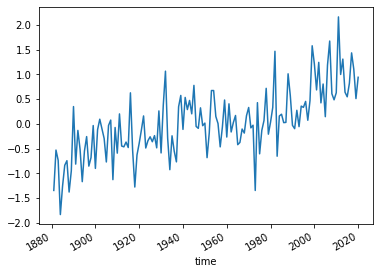

In [30]:
tempArea = tempDataLand.where(countryMask == countryIndex)
tempAtLoc = (tempArea * np.sqrt(np.cos(np.deg2rad(tempArea.lat)))).mean('lat').mean('lon')
tempAtLoc.resample(time='1A').mean('time').plot()

In [31]:
locDF = tempAtLoc.resample(time='1A').mean('time').to_pandas()
locDF = locDF.dropna()
quantized = pd.cut(locDF,bins=7,labels=False)

Text(0.5, 1, 'Canada Warming Stripes')

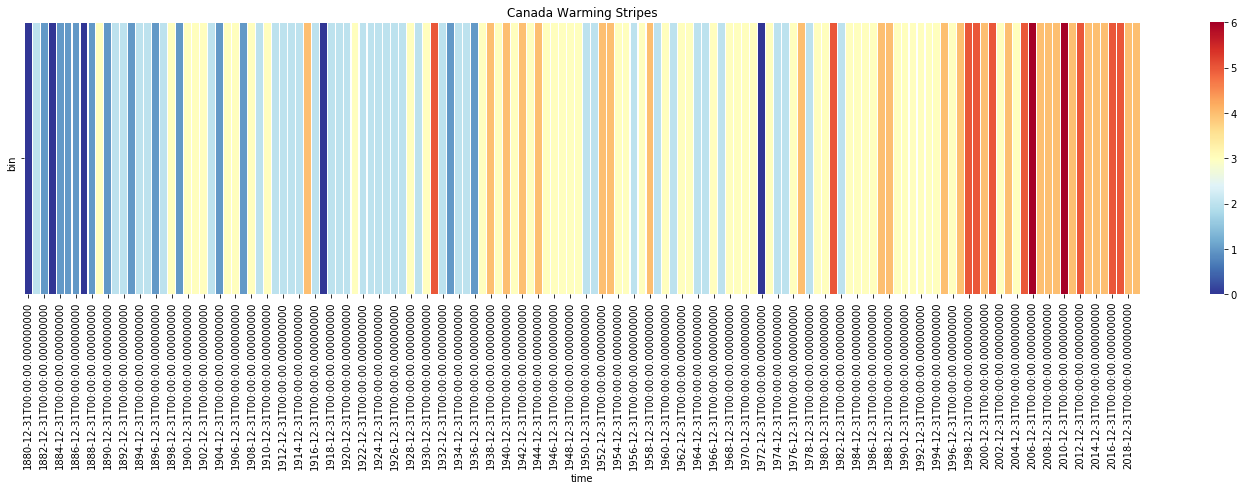

In [32]:
quantized.name = 'bin'
plt.figure(figsize=[25,5])
#plt.pcolor(pd.DataFrame(quantized).T,cmap=cm.RdBu_r)
sns.heatmap(pd.DataFrame(quantized).T,cmap=cm.RdYlBu_r,linewidths=0.1)
plt.title(countries.names[countryIndex]+' Warming Stripes')

In [33]:
colorList = ['dark blue', 'medium blue', 'light blue', 'yellow','pink','medium red','dark red']
newList = []
iPrev = quantized[quantized.index[0]]
count = 1
for i in quantized[quantized.index[1]::]:
    if i == iPrev:
        count += 1
    else:
        newList.append(str(count)+' of '+colorList[iPrev])
        count = 1
    iPrev=i
newList.append(str(count)+' of '+colorList[iPrev])
for item in newList:
    print(item,'\n')

1 of dark blue 

1 of light blue 

1 of medium blue 

1 of dark blue 

3 of medium blue 

1 of dark blue 

1 of medium blue 

1 of yellow 

1 of medium blue 

2 of light blue 

1 of medium blue 

2 of light blue 

1 of medium blue 

1 of light blue 

1 of yellow 

1 of medium blue 

3 of yellow 

1 of light blue 

1 of medium blue 

2 of yellow 

1 of medium blue 

1 of yellow 

1 of light blue 

1 of yellow 

4 of light blue 

1 of pink 

1 of light blue 

1 of dark blue 

3 of light blue 

1 of yellow 

6 of light blue 

1 of yellow 

1 of light blue 

1 of yellow 

1 of medium red 

1 of light blue 

1 of medium blue 

2 of light blue 

1 of medium blue 

1 of yellow 

1 of pink 

1 of yellow 

1 of pink 

1 of yellow 

1 of pink 

1 of yellow 

1 of pink 

5 of yellow 

2 of light blue 

2 of pink 

2 of yellow 

1 of light blue 

1 of yellow 

1 of pink 

1 of light blue 

1 of yellow 

1 of light blue 

2 of yellow 

2 of light blue 

1 of yellow 

1 of light blue 

4 of yellow 
